Nama  : Yunolva Anis Ramaziyah

Kelas : IF4409

NIM   : 1301204096

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [ ]:
url = '/content/Country-data.csv'
df_country = pd.read_csv(url)
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


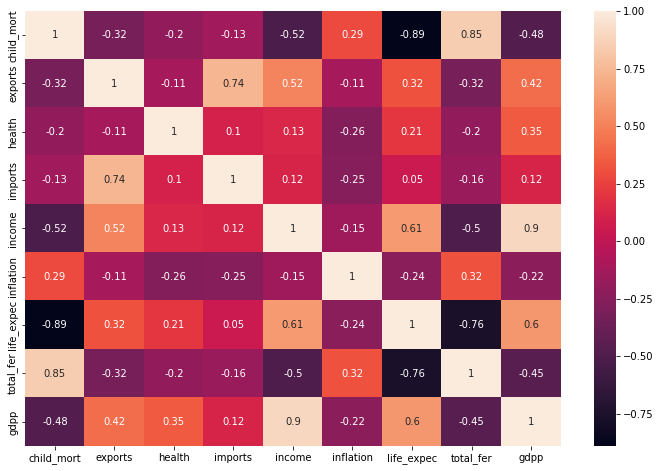

In [ ]:
corr = df_country.corr()
# print(corr)
matrix = df_country.corr().round(2)
plt.figure(figsize = (12,8))
sns.heatmap(matrix, annot=True, cmap="rocket")
plt.show()

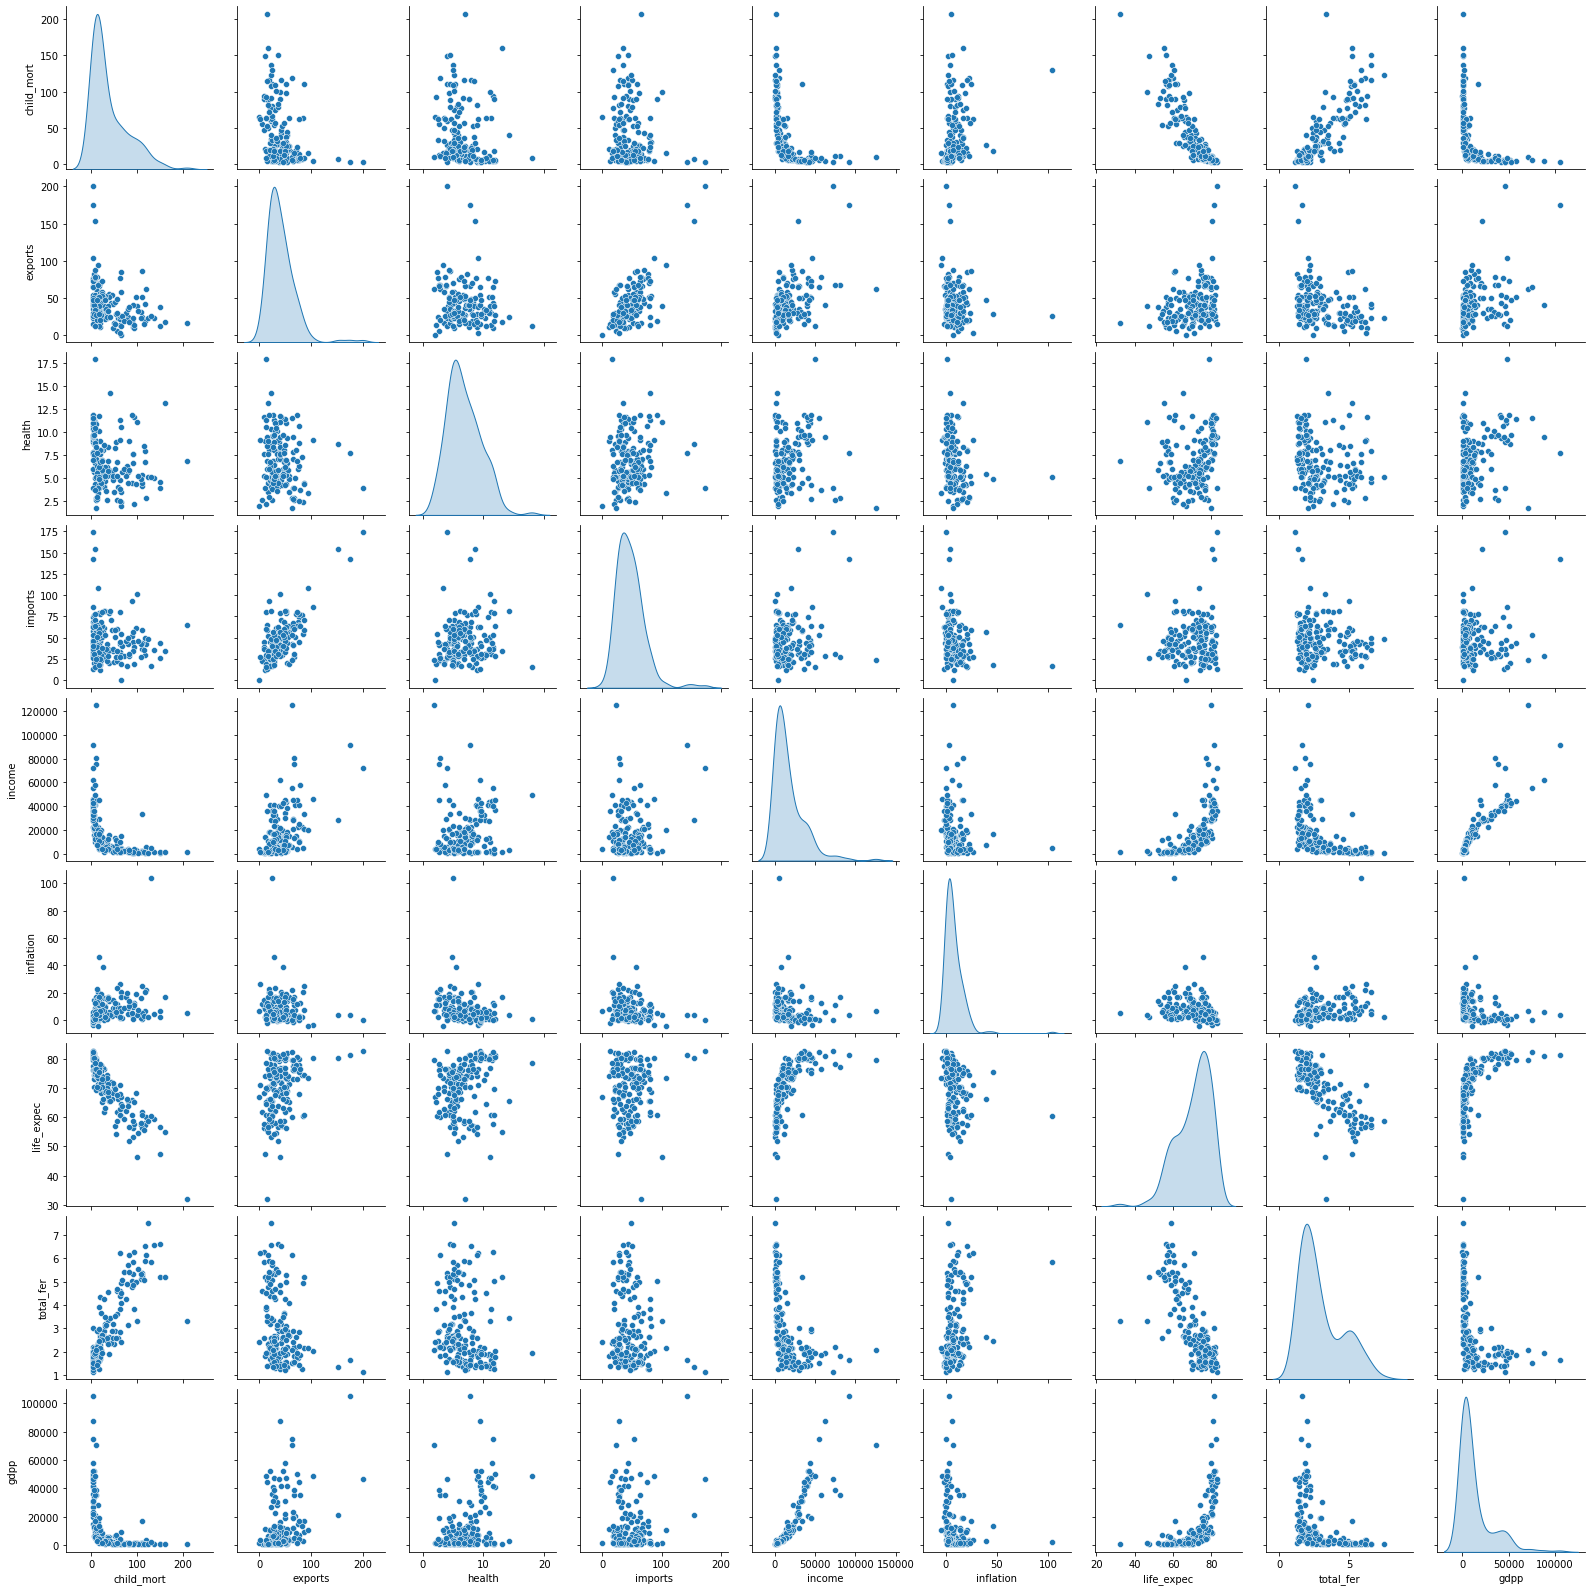

In [ ]:
df_country3 = sns.pairplot(df_country, diag_kind = "kde")

Data Handling

In [ ]:
# columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

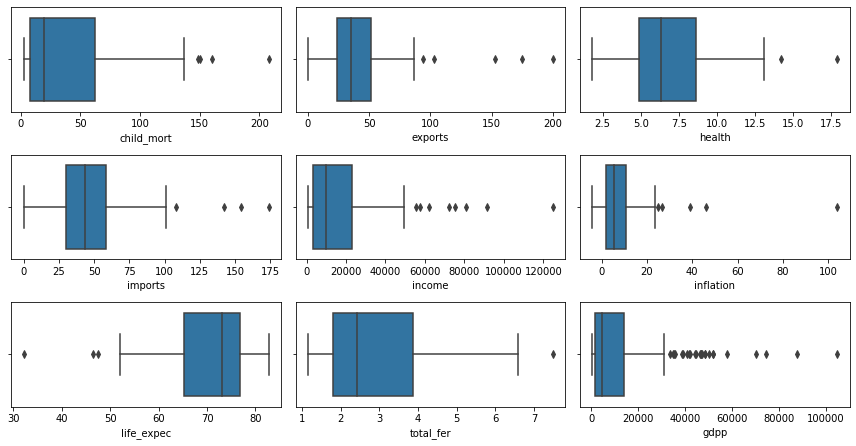

In [ ]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(df_country.drop('country', axis=1).columns):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(df_country[feature])
    plt.tight_layout()


In [ ]:
df_country2 = df_country.iloc[:,:]
def outliers_for_features(country_df, col):    
    Q1 = country_df.loc[:,col].quantile(0.25)
    Q3 = country_df.loc[:,col].quantile(0.75)
    
    upper_limit = Q3 + 1.5*(Q3-Q1)
    lower_limit = Q1 - 1.5*(Q3-Q1)
    
    return df_country2[col].apply(lambda x : upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)
for col in ['life_expec','inflation', 'total_fer', 'exports', 'imports', 'health', 'income', 'gdpp']:
    df_country2[col] = outliers_for_features(df_country2, col)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

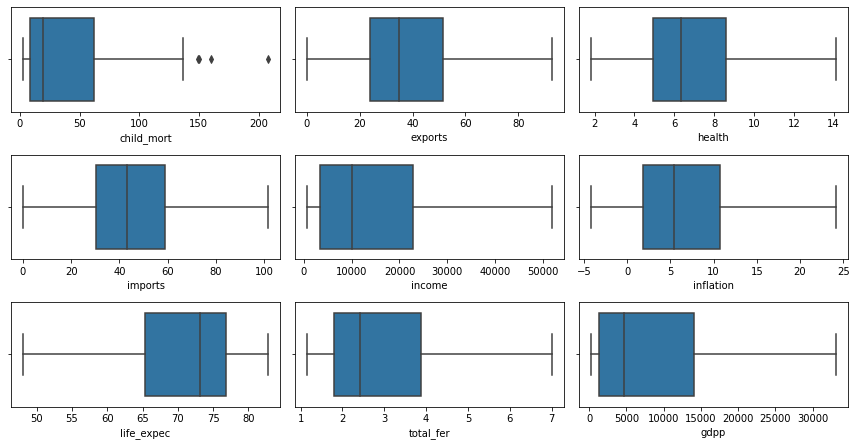

In [ ]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(df_country2.drop('country', axis=1).columns):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(df_country2[feature])
    plt.tight_layout()


In [ ]:
df_country2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500.0
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


Scaling data

In [ ]:
standard_scaler = StandardScaler()
scaled_df_country = standard_scaler.fit_transform(df_country2.iloc[:, 1:])

Hierarchical Clustering

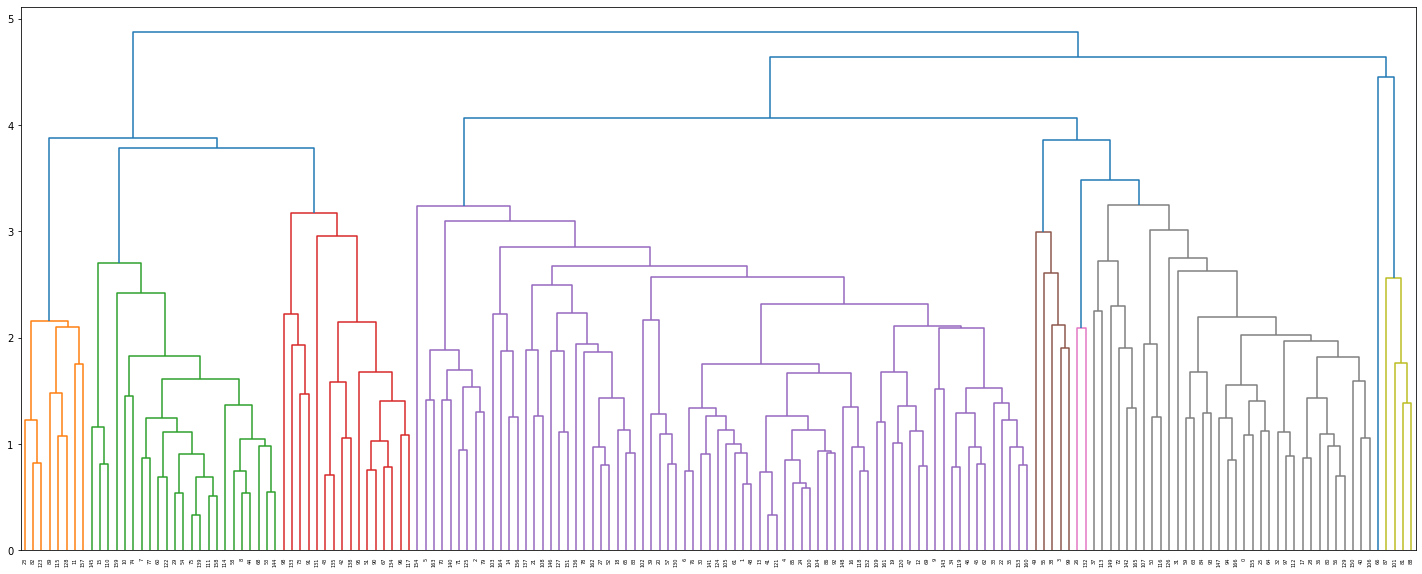

In [ ]:
linkageAverage = linkage(scaled_df_country, method="average", metric='euclidean')
fig = plt.figure(figsize=(25, 10))
dendrogram(linkageAverage)
plt.show()

In [ ]:
clusterLabel = cut_tree(linkageAverage, n_clusters=8).reshape(-1, )
print(clusterLabel)
print(clusterLabel.shape)

[0 1 1 2 1 1 1 3 3 1 3 4 1 1 1 3 1 0 1 1 1 1 1 4 1 0 0 1 0 3 1 0 0 1 1 1 0
 0 2 1 0 1 5 5 3 1 1 1 1 2 0 5 1 3 3 2 0 1 3 0 3 1 1 0 0 1 6 5 3 1 1 1 0 5
 3 3 1 3 1 1 0 7 4 1 0 1 1 7 7 4 5 5 1 0 0 5 5 0 5 2 1 7 1 1 1 1 0 0 1 1 3
 3 0 0 3 4 0 5 1 1 1 1 3 4 1 1 0 1 4 0 1 5 0 5 5 5 1 1 5 3 1 1 0 1 3 3 1 0
 1 0 0 1 1 1 1 0 1 4 3 3 1 1 1 1 1 0 0]
(167,)


In [ ]:
clustered_country = df_country2.iloc[:,:]
clustered_country = pd.concat([clustered_country, pd.DataFrame(clusterLabel, columns=['Clustering'])], axis = 1)
clustered_country


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clustering
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,1
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500.0,1
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,1
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,0


In [ ]:
print(clustered_country['Clustering'].value_counts())

1    74
0    36
3    23
5    16
4     8
2     5
7     4
6     1
Name: Clustering, dtype: int64


In [ ]:

print("Cluster 0")
print(clustered_country[clustered_country['Clustering'] == 0].country.unique())

print("Cluster 1")
print(clustered_country[clustered_country['Clustering'] == 1].country.unique())

print("Cluster 2")
print(clustered_country[clustered_country['Clustering'] == 2].country.unique())

print("Cluster 3")
print(clustered_country[clustered_country['Clustering'] == 3].country.unique())

print("Cluster 4")
print(clustered_country[clustered_country['Clustering'] == 4].country.unique())

print("Cluster 5")
print(clustered_country[clustered_country['Clustering'] == 5].country.unique())

print("Cluster 6")
print(clustered_country[clustered_country['Clustering'] == 6].country.unique())

print("Cluster 7")
print(clustered_country[clustered_country['Clustering'] == 7].country.unique())



Cluster 0
['Afghanistan' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 "Cote d'Ivoire" 'Eritrea' 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau'
 'Iraq' 'Kenya' 'Lao' 'Madagascar' 'Malawi' 'Mali' 'Mozambique' 'Myanmar'
 'Niger' 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'Sudan'
 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']
Cluster 1
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bangladesh' 'Barbados' 'Belarus' 'Belize' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Fiji' 'Georgia'
 'Grenada' 'Guatemala' 'Guyana' 'India' 'Indonesia' 'Iran' 'Jamaica'
 'Jordan' 'Kazakhstan' 'Kyrgyz Republic' 'Latvia' 'Lebanon'
 'Macedonia, FYR' 'Mauritius' 'Moldova' 'Mongolia' 'Montenegro' 'Morocco'
 'Namibia' 'Nepal' 'Paraguay' 'Peru

In [ ]:
clustered_country[(clustered_country['Clustering']==0)].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=['True', 'True', 'False'])[['country']].head(5)


,country
26,Burundi
37,"Congo, Dem. Rep."
112,Niger
132,Sierra Leone
93,Madagascar


In [ ]:
clustered_country[(clustered_country['Clustering']==1)].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=['True', 'True', 'False'])[['country']].head(5)

,country
109,Nepal
146,Tajikistan
12,Bangladesh
27,Cambodia
83,Kyrgyz Republic


In [ ]:
clustered_country[(clustered_country['Clustering']==2)].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=['True', 'True', 'False'])[['country']].head(5)

,country
99,Mauritania
38,"Congo, Rep."
3,Angola
55,Gabon
49,Equatorial Guinea


In [ ]:
clustered_country[(clustered_country['Clustering']==2)].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=['True', 'True', 'False'])[['country']].head(5)

,country
99,Mauritania
38,"Congo, Rep."
3,Angola
55,Gabon
49,Equatorial Guinea


In [ ]:
clustered_country[(clustered_country['Clustering']==3)].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=['True', 'True', 'False'])[['country']].head(5)

,country
122,Portugal
60,Greece
10,Bahamas
74,Israel
139,Spain


In [ ]:
clustered_country[(clustered_country['Clustering']==4)].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=['True', 'True', 'False'])[['country']].head(5)

,country
89,Libya
115,Oman
128,Saudi Arabia
11,Bahrain
157,United Arab Emirates


In [ ]:
clustered_country[(clustered_country['Clustering']==5)].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=['True', 'True', 'False'])[['country']].head(5)

,country
96,Maldives
117,Panama
95,Malaysia
131,Seychelles
90,Lithuania


In [ ]:
clustered_country[(clustered_country['Clustering']==6)].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=['True', 'True', 'False'])[['country']].head(5)

,country
66,Haiti


In [ ]:
clustered_country[(clustered_country['Clustering']==7)].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=['True', 'True', 'False'])[['country']].head(5)

,country
88,Liberia
87,Lesotho
81,Kiribati
101,"Micronesia, Fed. Sts."
